# The aim of this notebook:  code some basic cross-validation techniques from scratch
1. First I will look at Leave-One-Out cross validation and then
2. I will look at Leave-P-out cross validation, where the user can specify what sample percentage they would like as the test
data

##  Import the modules. 
It is important to import **numpy** and **scipy.optimize**

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

##  Generate the dummy data set (x range) 


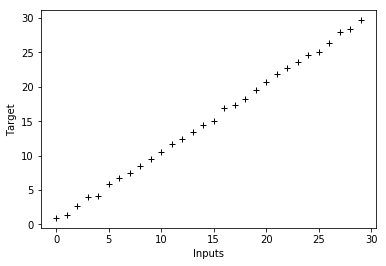

In [102]:
x_range = np.arange(0,30,1)
y = x_range +np.random.rand(len(x_range))  ## Here I have added random noise onto the straight line data
plt.plot(x_range, y, 'k+')
plt.xlabel('Inputs'); plt.ylabel('Target')
n = len(x_range)

In [103]:
# This first function calculates the mean squared error from the original data set in order to plot a line on the total original
#  dataset
def mse(B):
    me = np.array(B[0]+B[1]*x_range-y)
    return np.sum(me**2)

# This function calculates the mean squared error of a reduced dataset which will be used in the cross-validation section
def mse2(B):
    me = np.array(B[0] + B[1]*x_temp - y_temp)
    return np.sum(me**2)

## Next we need to minimize the mse by using opt.minimize
Remember that in a basic sense, when trying to fit a line to data points, we are trying to find coefficients of a line that results in a line that best fits the data.  So we are moving through the coefficient SPACE i.e. modifying the coefficents (b0 and b1) in order to find the smallest error between the line and the data points.

We use the scipy.optimize.minimize function and you can select various optimizers such as Nelder-Mead.

In [71]:
B = [1,1]
estimate = opt.minimize(mse,B, method='Nelder-Mead')
print(estimate)

 final_simplex: (array([[0.51644977, 0.99701316],
       [0.51653861, 0.9970028 ],
       [0.51635076, 0.99701129]]), array([2.04240292, 2.04240313, 2.04240323]))
           fun: 2.042402919377755
       message: 'Optimization terminated successfully.'
          nfev: 69
           nit: 37
        status: 0
       success: True
             x: array([0.51644977, 0.99701316])


## Next we see visually how the line matches the original data

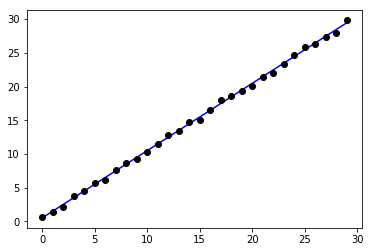

In [72]:
plt.plot(x_range,estimate['x'][1]*x_range+estimate['x'][0],'b-')
plt.plot(x_range, y, 'ko')


##  Leave one out cross validation
With leave one out cross validation, we leave one data point out of the set and then use the remaining data to fit a line.  Then we use the fitted line to predict what the left out data point is and find the error between the predicted value and the actual value.  We then do this for all the points and add up all the errors and then divide by the total data points.  This is the mean squared error = 1/n*(y-ypred)^2.  

This allows us to compare different models such as linear regression, non-linear regression, etc. and find which model results in the lowest error.

In [108]:
valError = []
error  = 0
for i in range(len(x_range)):
    x_temp = np.delete(x_range, i)  # Create a temp x-set by deleting the ith x data point
    y_temp = np.delete(y,i)  # create a temp y-data set by deleting the ith y data point
    est = opt.minimize(mse2,B, method='Nelder-Mead')  # find the coefficients that minimize the error for the remaining 
    # data points
    pred = est['x'][0] + est['x'][1]*x_range[i]  # fit aline, generate a function with the new coefficients
    residual = pred- y[i]  # calculate the residual between the predicted value and the actual y
    error = error + residual  # add up each error for every iteration
    squaredError  = error**2  # squared error
    valError.append(squaredError)

MSE = squaredError/(len(x_range))  # calculate the mean of the squared error
print(MSE)


0.00012969193858573488


In [107]:
valError = []
error  = 0
for i in range(len(x_range)):
    x_temp = np.delete(x_range, i)  # Create a temp x-set by deleting the ith x data point
    y_temp = np.delete(y,i)  # create a temp y-data set by deleting the ith y data point
    est = opt.minimize(mse2,B, method='BFGS')  # find the coefficients that minimize the error for the remaining 
    # data points
    pred = est['x'][0] + est['x'][1]*x_range[i]  # fit aline, generate a function with the new coefficients
    residual = pred- y[i]  # calculate the residual between the predicted value and the actual y
    error = error + residual  # add up each error for every iteration
    squaredError  = error**2  # squared error
    valError.append(squaredError/len(x_range))

MSE = squaredError/(len(x_range))  # calculate the mean of the squared error
print(MSE)


0.0001295557320310816
